# Stock Market Analysis of the S&P 500 Index

This post includes code and notes adapted from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_datareader
import datetime
import pandas_datareader.data as web

In [7]:
import statsmodels.api as sm
import quandl

In [20]:
start = datetime.datetime(2019, 1, 1)
end = pd.to_datetime('today')

In [21]:
SP500 = quandl.get("MULTPL/SP500_REAL_PRICE_MONTH",start_date = start,end_date = end)
SP500

,Value
Date,
2019-01-01,2607.39
2019-02-01,2754.86
2019-03-01,2803.98
2019-04-01,2903.80
2019-05-01,2854.71
2019-05-31,2752.08
2019-06-01,2890.17
2019-07-01,2996.11
2019-08-01,2897.50


<AxesSubplot:xlabel='Date'>

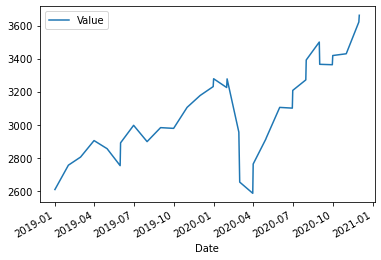

In [22]:
SP500.plot()

In [23]:
SP500.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-05-31', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2019-12-31', '2020-01-01', '2020-01-31',
               '2020-02-01', '2020-02-28', '2020-03-01', '2020-03-31',
               '2020-04-01', '2020-04-30', '2020-05-01', '2020-06-01',
               '2020-06-30', '2020-07-01', '2020-07-31', '2020-08-01',
               '2020-08-31', '2020-09-01', '2020-09-30', '2020-10-01',
               '2020-11-01', '2020-11-30', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [24]:
SP500.head()

,Value
Date,
2019-01-01,2607.39
2019-02-01,2754.86
2019-03-01,2803.98
2019-04-01,2903.80
2019-05-01,2854.71


Text(0, 0.5, 'SP500 Value')

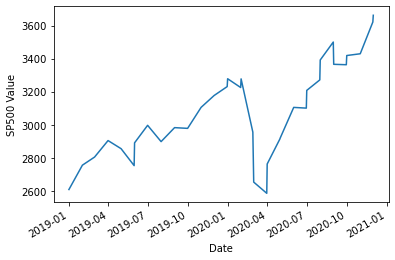

In [25]:
SP500['Value'].plot()
plt.ylabel("SP500 Value")

## Getting at the trend by removing the cyclical elements of the S&P 500 

In [26]:
# Tuple unpacking
SP500_cycle, SP500_trend = sm.tsa.filters.hpfilter(SP500.Value)

In [27]:
SP500_cycle

Date
2019-01-01   -159.626002
2019-02-01    -32.234117
2019-03-01     -3.092466
2019-04-01     76.968864
2019-05-01      8.461718
2019-05-31   -113.170164
2019-06-01      6.401669
2019-07-01     94.446400
2019-08-01    -21.300789
2019-09-01     47.056253
2019-10-01     27.196993
2019-11-01    140.021486
2019-12-01    198.502790
2019-12-31    239.946447
2020-01-01    275.993938
2020-01-31    211.756776
2020-02-01    252.953978
2020-02-28    -81.237788
2020-03-01   -396.749949
2020-03-31   -479.773159
2020-04-01   -320.220102
2020-04-30   -190.403605
2020-05-01   -206.636358
2020-06-01    -47.642048
2020-06-30    -80.445214
2020-07-01     -3.630618
2020-07-31     27.617253
2020-08-01    114.566186
2020-08-31    188.466703
2020-09-01     18.177725
2020-09-30    -20.499622
2020-10-01     -1.485569
2020-11-01    -27.927537
2020-11-30    127.057981
2020-12-01    130.481948
Name: Value_cycle, dtype: float64

In [28]:
type(SP500_cycle)

pandas.core.series.Series

In [29]:
SP500["trend"] = SP500_trend

<AxesSubplot:xlabel='Date'>

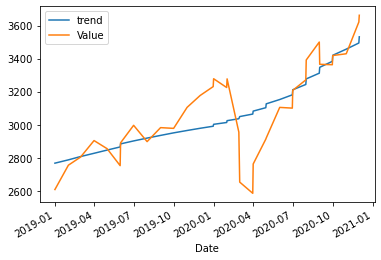

In [30]:
SP500[['trend','Value']].plot()

<AxesSubplot:xlabel='Date'>

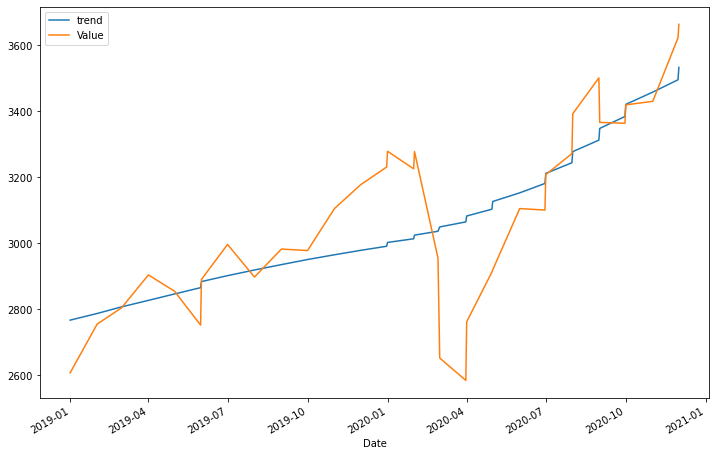

In [31]:
SP500[['trend','Value']]["2000-03-31":].plot(figsize=(12,8))